In [25]:

import pandas as pd
import numpy as np

import pandas as pd
import numpy as np

#from sklearn.metrics import SCORERS
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
#from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import DistanceMetric

from sklearn.model_selection import train_test_split
#from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate


#from sklearn.preprocessing import MaxAbsScaler
#from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#from imblearn.under_sampling import TomekLinks
#from imblearn.under_sampling import ClusterCentroids
#from imblearn.over_sampling import SMOTE
#from imblearn.combine import SMOTETomek

#from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost.sklearn import XGBClassifier



In [26]:
#tf = pd.read_csv('featuresMagui.csv') #mis features 
tf_seba = pd.read_csv('features_seba.csv') #los features de Seba
tf_santi = pd.read_csv('santi_timefeatures.csv')
tf_santi_2 = pd.read_csv('Santi_FeaturesConEventos.csv')
labels = pd.read_csv('../../data/labels_training_set.csv') #las personas de las cuales tengo Info
personas =pd.read_csv('../../data/trocafone_kaggle_test.csv') #las personas a las que le tengo que predecir

In [27]:
#Datos a entregar
santi_seba = pd.merge(tf_santi_2,tf_seba, on = 'person',how = 'inner')
datos = pd.merge(personas, santi_seba, on = 'person', how = 'inner')

In [69]:
#Datos para entrenar
labels_f = pd.merge(tf_santi_2,tf_seba, on = 'person',how = 'inner')
labels_f = pd.merge(labels, labels_f, on = 'person', how = 'inner')

In [162]:
y = labels_f.iloc[:,1:2]
X = labels_f.iloc[:,3: 406]

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 123)

In [164]:
labels_f.shape

(19414, 196)

In [165]:
X_train.shape

(15531, 193)

# Seleccion de features con random Forest

In [73]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

clf.fit(X_train, y_train)

preds = clf.predict(X_test)
preds_prob = clf.predict_proba(X_test)[:,1]
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, preds)
area_debajo_de_curva = roc_auc_score(y_test, preds_prob)
matriz_de_confusion = confusion_matrix(y_test, preds)
print('train acurracy: ')
print(train_accuracy)
print('test acurracy: ')
print(test_accuracy)
print('Matriz de confusión: ')
print(matriz_de_confusion)
print('Área bajo la curva: ')
print(area_debajo_de_curva)

C:\Users\seba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


train acurracy: 
0.9491983774386711
test acurracy: 
0.950811228431625
Matriz de confusión: 
[[3692    0]
 [ 191    0]]
Área bajo la curva: 
0.8378877777336593


In [74]:
importancia = clf.feature_importances_
len(importancia)
#for columna in datos

193

In [75]:
importancia_con_nombre = {}
features = X.columns
for i in range(193):
    importancia_con_nombre[features[i]] = importancia[i]
importancia_con_nombre

{'ad campaign hit': 0.0,
 'brand listing': 0.013047514291621574,
 'checkout': 0.1394046320910954,
 'conversion': 0.010413089352439599,
 'generic listing': 0.01388067368850833,
 'lead': 0.001533988046273576,
 'search engine hit': 0.021983770877286705,
 'searched products': 0.004211142885082511,
 'staticpage': 0.0,
 'viewed product': 0.021698387359219567,
 'visited site': 0.02258487565149252,
 'vis_iPhone 6S Plus': 0.0,
 'vis_iPhone 7 Plus': 0.0,
 'vis_iPhone 6 Plus': 0.0,
 'vis_iPhone 6S': 0.0,
 'vis_Samsung Galaxy S7 Edge': 0.0,
 'vis_Samsung Galaxy S6 Flat': 0.001500213586966931,
 'vis_iPhone SE': 0.0,
 'vis_Samsung Galaxy S6 Edge': 0.0004962802460011383,
 'vis_iPhone 5s': 0.0017613245658812163,
 'vis_Samsung Galaxy S5': 0.0,
 'vis_Samsung Galaxy J5': 0.0,
 'vis_iPhone 6': 0.0,
 'vis_Samsung Galaxy A7 2017': 0.0007390614229132705,
 'vis_iPhone 5c': 0.001038332445660482,
 'vis_Samsung Galaxy J7 2016 Metal': 0.0022277716150310425,
 'checkout_iPhone 6S': 0.0,
 'checkout_Samsung Galaxy J5

In [76]:
atributos_importantes = []
for clave in importancia_con_nombre.keys():
    if importancia_con_nombre[clave] > 0:
        atributos_importantes.append(clave)

In [77]:
#0.002
len(atributos_importantes)

72

In [78]:
atributos_importantes

['brand listing',
 'checkout',
 'conversion',
 'generic listing',
 'lead',
 'search engine hit',
 'searched products',
 'viewed product',
 'visited site',
 'vis_Samsung Galaxy S6 Flat',
 'vis_Samsung Galaxy S6 Edge',
 'vis_iPhone 5s',
 'vis_Samsung Galaxy A7 2017',
 'vis_iPhone 5c',
 'vis_Samsung Galaxy J7 2016 Metal',
 'checkout_iPhone 4G',
 'checkout_Samsung Galaxy On 7',
 'checkout_iPhone 7',
 'checkout_iPhone 4S',
 'viewedproduct_Cinza espacial',
 'viewedproduct_Preto',
 'viewedproduct_Branco',
 'viewedproduct_Prateado',
 'viewedproduct_Ouro Rosa',
 'viewedproduct_Dourado',
 'viewedproduct_Azul',
 'viewedproduct_Preto Matte',
 'viewedproduct_Verde',
 'viewedproduct_128GB',
 'viewedproduct_16GB',
 'viewedproduct_32GB',
 'viewedproduct_4GB',
 'viewedproduct_8GB',
 'viewedproduct_Bom',
 'viewedproduct_Bom - Sem Touch ID',
 'viewedproduct_Excelente',
 'viewedproduct_Muito Bom',
 'viewedproduct_Novo',
 'vuelve',
 'visitedsite_Para',
 'visitedsite_Computer',
 'visitedsite_Smartphone',
 '

In [79]:
X_imp = X.filter(items= atributos_importantes)
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size= 0.2, random_state= 123)

### Pruebo con XGBoost

In [260]:
magui = pd.read_csv('labels_f_filtrado.csv')

In [80]:
def xgboost(X_p, y_p, X_train_p, X_test_p, y_train_p, y_test_p):
    xg_reg = xgb.XGBClassifier(learning_rate =0.1, n_estimators=6, max_depth=5, min_child_weight=12,
                           colsample_bytree=0.8, objective= 'binary:logistic', scale_pos_weight = 5)
    
    xg_reg.fit(X_train_p,y_train_p, early_stopping_rounds = 5, eval_set=[(X_test, y_test)])
    preds = xg_reg.predict(X_test_p)
    preds_prob = xg_reg.predict_proba(X_test_p)[:,1]
    train_accuracy = accuracy_score(y_train_p, xg_reg.predict(X_train_p))
    test_accuracy = accuracy_score(y_test_p, preds)
    area_debajo_de_curva = roc_auc_score(y_test_p, preds_prob)
    matriz_de_confusion = confusion_matrix(y_test_p, preds)
    print('train acurracy: ')
    print(train_accuracy)
    print('test acurracy: ')
    print(test_accuracy)
    print('Matriz de confusión: ')
    print(matriz_de_confusion)
    print('Área bajo la curva: ')
    print(area_debajo_de_curva)
    return(xg_reg)

In [81]:
xg_reg =xgboost(X_imp, y, X_train, X_test, y_train, y_test)

[0]	validation_0-error:0.11589
Will train until validation_0-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.110997


C:\Users\seba\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\seba\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.105846
[3]	validation_0-error:0.093742
[4]	validation_0-error:0.094257
[5]	validation_0-error:0.092712
train acurracy: 
0.9162964393793059
test acurracy: 
0.9072881792428534
Matriz de confusión: 
[[3440  252]
 [ 108   83]]
Área bajo la curva: 
0.8583147090355261


# Seleccion de features con RFECV

Optimal number of features : 23


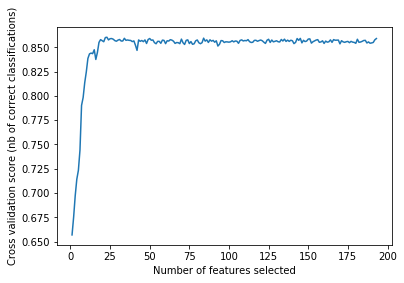

In [85]:
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=xg_reg, step=1, cv=StratifiedKFold(10),
              scoring='roc_auc')
rfecv.fit(X, y['label'].ravel())

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [86]:
# Selecciono los n features para entrenar
mask = rfecv.get_support()
features_X = X.columns[mask]
new_x = X.filter(items=features_X)

In [87]:
# Entrenamos y predecimos
X_train, X_test, y_train, y_test = train_test_split(new_x, y['label'], test_size=0.2, random_state=123)
    
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)

xg_reg.fit(X_train,y_train)
proba = xg_reg.predict_proba(X_test)[:,1]
print("ROC auc score: ", roc_auc_score(y_test, proba))

ROC auc score:  0.8621995768408275


# Seleccion de features con RFE

### Usando todos los features

In [58]:
from sklearn.feature_selection import RFE
#Instanciamos el regresor de XGBoost

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)


In [255]:
n = 43
rfe = RFE(xg_reg, n)
rfe = rfe.fit(X, y['label'].ravel())
   
print('n = ', n)
   
# Selecciono los n features para entrenar
mask = rfe.get_support()
features_X = X.columns[mask]
new_x = X.filter(items=features_X)

n =  43


In [261]:
# Entrenamos y predecimos
X_train, X_test, y_train, y_test = train_test_split(new_x, y['label'], test_size=0.2, random_state=123)
    
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)

xg_reg.fit(X_train,y_train)
proba = xg_reg.predict_proba(X_test)[:,1]
print("ROC auc score: ", roc_auc_score(y_test, proba))
# con tf_santi_2,tf_seba, y n=43 me da 0.8626966186972823 (y con X) ESTE SUBI A KAGGLE

ROC auc score:  0.8626966186972823


### Con sampleo

In [173]:
np.sum(y_train == 1)

789

In [250]:
def kaggle_oversampling(df, cant_unos):
   
    df_train = pd.merge(df, labels, on="person", how="inner")\
            .drop(columns = ['person'])
    
    # Separamos la variable a predecir

    y = labels_f.iloc[:,1:2]
    X = labels_f.iloc[:,3: 406]
    
    datos = pd.merge(df, personas, on='person', how='inner').filter(items= list(df_train.columns) + ['person'])
    df_final_sin_persons = datos.drop(columns='person')
     
    cant_ceros = np.sum(y == 0)
    
    ros = RandomOverSampler(random_state=2, sampling_strategy = {0: cant_ceros, 1: cant_unos})
    X_res, y_res = ros.fit_sample(X, y)
    X_res_df = pd.DataFrame(X_res)
    X_res_df.columns = X_test.columns

    xg_reg = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)

    #Entrenamos

    xg_reg.fit(X_res_df, y_res)
    
    proba = pd.Series(xg_reg.predict_proba(df_final_sin_persons)[:,1])

    predicciones = datos[['person']]
    predicciones['label'] = proba
    predicciones.to_csv('predicciones.csv', encoding='utf-8', index=False)

    print(predicciones.shape[0] == 19415)

    train_accuracy = accuracy_score(y_res, xg_reg.predict(X_res_df))

    print("Train accuracy: ", train_accuracy)


#### Para subir a Kaggle

In [217]:
cant_ceros = np.sum(y == 0)

ros = RandomOverSampler(random_state=2, sampling_strategy = {0: 18434, 1: 1191})
X_train_res, y_train_res = ros.fit_sample(X_train, y_train.ravel())



In [186]:

xg_reg.fit(Xr_df, yr['label'])


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=15, missing=None, n_estimators=6,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=7, seed=None,
       silent=True, subsample=1)

In [187]:
df_final = datos.filter(items= ['person'] + list(features_X))
df_final_sin_persons= df_final.drop(columns='person')
df_final.head(10)

,person,brand listing,checkout,conversion,generic listing,search engine hit,searched products,viewed product,vis_iPhone SE,vis_Samsung Galaxy J7 2016 Metal,...,viewedproduct_Bom,visitedsite_Computer,visitedsite_Smartphone,checkout mes 5,conversion mes 5,viewed product mes 5,dias_hasta_ultimo,distan_dias,promedio_por_dia_x,promedio_por_mes
0,4886f805,0.0,1.0,0.0,1.0,1.0,1.0,4.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,4.0,13,0,9.000000,9.0
1,0297fc1e,4.0,7.0,0.0,21.0,0.0,6.0,404.0,8.0,0.0,...,239.0,0.0,1.0,2.0,0.0,133.0,3,138,9.610169,113.4
2,2d681dd8,5.0,1.0,0.0,1.0,2.0,1.0,13.0,0.0,0.0,...,13.0,1.0,0.0,1.0,0.0,13.0,4,9,13.000000,26.0
3,cccea85e,7.0,1.0,0.0,20.0,26.0,1.0,739.0,0.0,0.0,...,200.0,1.0,0.0,1.0,0.0,739.0,0,23,64.307692,836.0
4,4c8a8b93,8.0,2.0,0.0,14.0,13.0,9.0,177.0,26.0,0.0,...,55.0,0.0,1.0,2.0,0.0,177.0,9,4,51.400000,257.0
5,29ebb414,0.0,1.0,0.0,3.0,4.0,11.0,8.0,0.0,0.0,...,2.0,0.0,1.0,1.0,0.0,8.0,11,2,17.500000,35.0
6,3dc1950f,6.0,3.0,0.0,25.0,7.0,2.0,595.0,0.0,0.0,...,167.0,1.0,0.0,2.0,0.0,248.0,2,41,35.368421,336.0
7,8ea4c165,5.0,3.0,0.0,8.0,9.0,17.0,97.0,1.0,1.0,...,24.0,1.0,0.0,2.0,0.0,87.0,12,20,31.800000,79.5
8,d8cfe234,4.0,3.0,1.0,1.0,2.0,8.0,39.0,0.0,0.0,...,19.0,1.0,0.0,2.0,1.0,36.0,9,42,12.400000,31.0
9,d6bc64df,0.0,2.0,0.0,12.0,8.0,19.0,155.0,25.0,0.0,...,86.0,1.0,1.0,1.0,0.0,65.0,13,30,30.428571,106.5


In [188]:
#preds = xg_reg.predict(X_test)
proba = pd.Series(xg_reg.predict_proba(df_final_sin_persons)[:,1])

predicciones = df_final[['person']]

predicciones['label'] = proba

C:\Users\seba\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [189]:
predicciones.to_csv('predicciones_oversamp.csv', encoding='utf-8', index=False)

In [190]:
predicciones.shape

(19415, 2)

In [191]:
predicciones.head()

,person,label
0,4886f805,0.287248
1,0297fc1e,0.371356
2,2d681dd8,0.316747
3,cccea85e,0.426195
4,4c8a8b93,0.355123


In [121]:
predicciones.head()

,person,label
0,4886f805,0.287248
1,0297fc1e,0.371356
2,2d681dd8,0.316747
3,cccea85e,0.426195
4,4c8a8b93,0.355123


In [153]:
def probar_oversampling(df, cant_unos):
    
    labels_f = pd.merge(labels, df, on = 'person', how = 'inner')
    y = labels_f.iloc[:,1:2]
    X = labels_f.iloc[:,3: 406]
    
    xg_reg = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)
    n = 22
    rfe = RFE(xg_reg, n)
    rfe = rfe.fit(X, y['label'].ravel())
   
    print('n = ', n)
   
    # Selecciono los n features para entrenar
    mask = rfe.get_support()
    features_X = X.columns[mask]
    new_x = X.filter(items=features_X)
    

    X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size=0.2, random_state=123)
    
    cant_ceros = np.sum(y_train == 0)
    
    ros = RandomOverSampler(random_state=2, sampling_strategy = {0: cant_ceros, 1: cant_unos})
    X_train_res, y_train_res = ros.fit_sample(X_train, y_train)
    X_train_res_df = pd.DataFrame(X_train_res)
    X_train_res_df.columns = X_test.columns


    xg_reg.fit(X_train_res_df, y_train_res)

    preds = xg_reg.predict(X_test)
    proba = xg_reg.predict_proba(X_test)[:,1]
    
    train_accuracy = accuracy_score(y_train_res, xg_reg.predict(X_train_res_df))
    test_accuracy = accuracy_score(y_test, preds)
    matriz_de_confusion = confusion_matrix(y_test, preds)
    area_debajo_de_curva = roc_auc_score(y_test, proba)

    print("Train accuracy: ", train_accuracy)
    print("Test acuracy: ", test_accuracy)
    print("ROC auc score: ", area_debajo_de_curva)
    print("Confusion matrix: ")
    print(matriz_de_confusion)

#### iterando

In [122]:
# Con el seba_features.csv
for n in range(40,100,5):
    # create the RFE model and select n attributes
    rfe = RFE(xg_reg, n)
    rfe = rfe.fit(X, y['label'].ravel())
    
    print('n = ', n)
    
    # Selecciono los n features para entrenar
    mask = rfe.get_support()
    features_X = X.columns[mask]
    new_x = X.filter(items=features_X)
    
    # Entrenamos y predecimos
    X_train, X_test, y_train, y_test = train_test_split(new_x, y['label'], test_size=0.2, random_state=123)
    
    xg_reg = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)

    xg_reg.fit(X_train,y_train)
    proba = xg_reg.predict_proba(X_test)[:,1]
    print("ROC auc score: ", roc_auc_score(y_test, proba))


n =  40
ROC auc score:  0.8673132228732847
n =  45
ROC auc score:  0.864007646361455
n =  50
ROC auc score:  0.8613940995955598
n =  55
ROC auc score:  0.8640012649396176
n =  60
ROC auc score:  0.8630397973827661
n =  65
ROC auc score:  0.8636864481289671
n =  70
ROC auc score:  0.8641849080791637
n =  75
ROC auc score:  0.862902951336695
n =  80
ROC auc score:  0.8632362033659874
n =  85
ROC auc score:  0.865595911352124
n =  90
ROC auc score:  0.8642522675318929
n =  95
ROC auc score:  0.868113027743586


In [135]:
# Con el seba_features.csv
for n in range(85,90,1):
    # create the RFE model and select n attributes
    rfe = RFE(xg_reg, n)
    rfe = rfe.fit(X, y['label'].ravel())
    
    print('n = ', n)
    
    # Selecciono los n features para entrenar
    mask = rfe.get_support()
    features_X = X.columns[mask]
    new_x = X.filter(items=features_X)
    
    # Entrenamos y predecimos
    X_train, X_test, y_train, y_test = train_test_split(new_x, y['label'], test_size=0.2, random_state=123)
    
    xg_reg = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)

    xg_reg.fit(X_train,y_train)
    proba = xg_reg.predict_proba(X_test)[:,1]
    print("ROC auc score: ", roc_auc_score(y_test, proba))


n =  85
ROC auc score:  0.865595911352124
n =  86
ROC auc score:  0.8659086010221619
n =  87
ROC auc score:  0.8665878679244213
n =  88
ROC auc score:  0.8653675982597153


KeyboardInterrupt: 

Funciones CV

In [99]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict

In [127]:
def stratifiedCVConRFE(data, n):
    
    df_train = pd.merge(data, labels,how = 'inner', on ='person')
    df_train.drop(columns = ['person'],inplace = True)
    
    X = df_train.drop(columns = ['label'])
    y = df_train['label']
    
    model = xgb.XGBRegressor(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)
    
    stratifiedKFold = StratifiedKFold(n_splits = 10, random_state = 7)
    
    #n = 22
    rfe = RFE(model, n)
    rfe = rfe.fit(X, y.ravel())

    # Selecciono los n features para entrenar
    mask = rfe.get_support()
    features_X = X.columns[mask]
    X = X.filter(items = features_X)
    
    results = cross_val_score(model, X, y, cv = stratifiedKFold, scoring = 'roc_auc')
        
    print("ROC AUC: ",results.mean())
    return results.mean()

In [128]:
def stratifiedCV(data):
    
    df_train = pd.merge(data,df_labels,how = 'inner', on ='person')
    df_train.drop(columns = ['person'],inplace = True)
    
    X = df_train.drop(columns = ['label'])
    y = df_train['label']
    
    model = xgb.XGBRegressor(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)
    
    stratifiedKFold = StratifiedKFold(n_splits = 10, random_state = 7)
    
    results = cross_val_score(model, X, y, cv = stratifiedKFold, scoring = 'roc_auc')
    #results2 = cross_val_predict(model, X, y, cv = stratifiedKFold, method='predict_proba')
    
    print("ROC AUC: ",results.mean())

In [109]:
stratifiedCVConRFE(santi_seba)

ROC AUC:  0.8621336988792171


In [106]:
#n= 43 da 0.8557534566892058
stratifiedCVConRFE(santi_seba)

ROC AUC:  0.8557534566892058


#### Iterando con CV y RFE para obtener el mas optimo

In [129]:
bestK = 0
score = 0
for i in range(17,193):
    score_act = stratifiedCVConRFE(santi_seba, i)
    if(score_act > score):
        score = score_act
        bestK = i
        print(bestK)

ROC AUC:  0.8577743720822442
17
ROC AUC:  0.8637964575200424
18
ROC AUC:  0.8606825764221908
ROC AUC:  0.8634977912892795
ROC AUC:  0.8560359637420938


KeyboardInterrupt: 

### Usando los features ''importantes'' del random forest

In [61]:
n = 43
rfe = RFE(xg_reg, n)
rfe = rfe.fit(X_imp, y['label'].ravel())
   
print('n = ', n)
   
# Selecciono los n features para entrenar
mask = rfe.get_support()
features_X = X_imp.columns[mask]
new_x = X_imp.filter(items=features_X)

n =  43


In [62]:
# Entrenamos y predecimos
X_train, X_test, y_train, y_test = train_test_split(new_x, y['label'], test_size=0.2, random_state=123)
    
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)

xg_reg.fit(X_train,y_train)
proba = xg_reg.predict_proba(X_test)[:,1]
print("ROC auc score: ", roc_auc_score(y_test, proba))
# con tf_santi_2,tf_seba, y n=43 me da 0.8670756921715554 (con X_imp)

ROC auc score:  0.8665524155808795


#### Para subir a Kaggle

In [116]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)

xg_reg.fit(new_x,y['label'])


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=15, missing=None, n_estimators=6,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=7, seed=None,
       silent=True, subsample=1)

In [117]:
df_final = datos.filter(items= ['person'] + list(features_X))
df_final_sin_persons= df_final.drop(columns='person')
df_final.head(10)

,person,brand listing,checkout,conversion,generic listing,search engine hit,searched products,viewed product,vis_iPhone SE,vis_Samsung Galaxy J7 2016 Metal,...,viewedproduct_Bom,visitedsite_Computer,visitedsite_Smartphone,checkout mes 5,conversion mes 5,viewed product mes 5,dias_hasta_ultimo,distan_dias,promedio_por_dia_x,promedio_por_mes
0,4886f805,0.0,1.0,0.0,1.0,1.0,1.0,4.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,4.0,13,0,9.000000,9.0
1,0297fc1e,4.0,7.0,0.0,21.0,0.0,6.0,404.0,8.0,0.0,...,239.0,0.0,1.0,2.0,0.0,133.0,3,138,9.610169,113.4
2,2d681dd8,5.0,1.0,0.0,1.0,2.0,1.0,13.0,0.0,0.0,...,13.0,1.0,0.0,1.0,0.0,13.0,4,9,13.000000,26.0
3,cccea85e,7.0,1.0,0.0,20.0,26.0,1.0,739.0,0.0,0.0,...,200.0,1.0,0.0,1.0,0.0,739.0,0,23,64.307692,836.0
4,4c8a8b93,8.0,2.0,0.0,14.0,13.0,9.0,177.0,26.0,0.0,...,55.0,0.0,1.0,2.0,0.0,177.0,9,4,51.400000,257.0
5,29ebb414,0.0,1.0,0.0,3.0,4.0,11.0,8.0,0.0,0.0,...,2.0,0.0,1.0,1.0,0.0,8.0,11,2,17.500000,35.0
6,3dc1950f,6.0,3.0,0.0,25.0,7.0,2.0,595.0,0.0,0.0,...,167.0,1.0,0.0,2.0,0.0,248.0,2,41,35.368421,336.0
7,8ea4c165,5.0,3.0,0.0,8.0,9.0,17.0,97.0,1.0,1.0,...,24.0,1.0,0.0,2.0,0.0,87.0,12,20,31.800000,79.5
8,d8cfe234,4.0,3.0,1.0,1.0,2.0,8.0,39.0,0.0,0.0,...,19.0,1.0,0.0,2.0,1.0,36.0,9,42,12.400000,31.0
9,d6bc64df,0.0,2.0,0.0,12.0,8.0,19.0,155.0,25.0,0.0,...,86.0,1.0,1.0,1.0,0.0,65.0,13,30,30.428571,106.5


In [118]:
#preds = xg_reg.predict(X_test)
proba = pd.Series(xg_reg.predict_proba(df_final_sin_persons)[:,1])

predicciones = df_final[['person']]

predicciones['label'] = proba

C:\Users\seba\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [119]:
predicciones.to_csv('predicciones_p5.csv', encoding='utf-8', index=False)

In [120]:
predicciones.shape

(19415, 2)

In [121]:
predicciones.head()

,person,label
0,4886f805,0.287248
1,0297fc1e,0.371356
2,2d681dd8,0.316747
3,cccea85e,0.426195
4,4c8a8b93,0.355123


### Para subir a kaggle con los features 'importantes' de rf

In [178]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 5, n_estimators = 6, scale_pos_weight = 7, min_child_weight=15)

xg_reg.fit(new_x,y['label'])


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=15, missing=None, n_estimators=6,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=7, seed=None,
       silent=True, subsample=1)

In [179]:
df_final = datos.filter(items= ['person'] + list(features_X))
df_final_sin_persons= df_final.drop(columns='person')
df_final.head(10)

,person,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,...,searched products mes 5,viewed product mes 5,dias_hasta_ultimo,viewed product mes 4,visited site mes 4,distan_dias,cant_dias_dist,modelos_dist,promedio_por_dia_x,promedio_por_mes
0,4886f805,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0,...,1.0,4.0,13,0.0,0.0,0,1,1,9.000000,9.0
1,0297fc1e,4.0,7.0,0.0,21.0,1.0,0.0,6.0,0.0,404.0,...,0.0,133.0,3,100.0,22.0,138,59,15,9.610169,113.4
2,2d681dd8,5.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,13.0,...,1.0,13.0,4,0.0,0.0,9,2,3,13.000000,26.0
3,cccea85e,7.0,1.0,0.0,20.0,0.0,26.0,1.0,5.0,739.0,...,1.0,739.0,0,0.0,0.0,23,13,57,64.307692,836.0
4,4c8a8b93,8.0,2.0,0.0,14.0,0.0,13.0,9.0,0.0,177.0,...,9.0,177.0,9,0.0,0.0,4,5,9,51.400000,257.0
5,29ebb414,0.0,1.0,0.0,3.0,0.0,4.0,11.0,0.0,8.0,...,11.0,8.0,11,0.0,0.0,2,2,3,17.500000,35.0
6,3dc1950f,6.0,3.0,0.0,25.0,0.0,7.0,2.0,1.0,595.0,...,1.0,248.0,2,347.0,13.0,41,19,56,35.368421,336.0
7,8ea4c165,5.0,3.0,0.0,8.0,0.0,9.0,17.0,0.0,97.0,...,10.0,87.0,12,10.0,2.0,20,5,15,31.800000,79.5
8,d8cfe234,4.0,3.0,1.0,1.0,0.0,2.0,8.0,0.0,39.0,...,8.0,36.0,9,3.0,1.0,42,5,7,12.400000,31.0
9,d6bc64df,0.0,2.0,0.0,12.0,0.0,8.0,19.0,0.0,155.0,...,15.0,65.0,13,90.0,5.0,30,7,13,30.428571,106.5


In [180]:
#preds = xg_reg.predict(X_test)
proba = pd.Series(xg_reg.predict_proba(df_final_sin_persons)[:,1])

predicciones = df_final[['person']]

predicciones['label'] = proba

In [184]:
predicciones.to_csv('predicciones_p3.csv', encoding='utf-8', index=False)

In [185]:
predicciones.head()

,person,label
0,4886f805,0.290033
1,0297fc1e,0.391954
2,2d681dd8,0.306680
3,cccea85e,0.439707
4,4c8a8b93,0.336995
